In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [2]:
%matplotlib notebook
import pylab
import matplotlib.pyplot as plt
import math
import sympy as sym
import numpy as np
import ipywidgets as widgets
import control as control
import math as math
from ipywidgets import interact
from IPython.display import Latex, display, Markdown

## Linearization of a function

### Introduction

> Linearization is defined as a process of finding a linear approximation of a function at a certain point. The linear approximation of a function is obtained by the Taylor expansion around the point of interest in which only the first two terms are kept. Linearization is an effective method for approximating the output of a function $y=f(x)$ at any $x=x_0+\Delta x$ based on the value and the slope of the function at $x=x_0+\Delta x$, given that $f(x)$ is differentiable on $[x_0,x_0+\Delta x]$ (or $[x_0+\Delta x,x_0]$) and that $x_0$ is close to $x_0+\Delta x$. In short, linearization approximates the output of a function near $x=x_0$. (source: [Wikipedia](https://en.wikipedia.org/wiki/Linearization))

In this example, linearization is defined as: 

\begin{equation}
    f(x)\approx f(x_0)+f^{\prime}(x_0) \cdot (x-x_0),
\end{equation}

where $f^{\prime}=\frac{f(x_0+h)-f(x_0)}{h}$ ($h$ is set to $0.01$ in order to calculate the derivative).

Unit step function is defined as: 

\begin{equation}
    u(x) =
    \begin{cases}
      0; & \text{$x<0$}\\
      1; & \text{$x\geq0$}
    \end{cases},
\end{equation}

and unit ramp function: 

\begin{equation}
    r(x) =
    \begin{cases}
      0; & \text{$x<0$}\\
      x; & \text{$x\geq0$}      
    \end{cases}.
\end{equation}   
    
---

### How to use this notebook?
Move the slider to change the value of $x_0$, i.e. the $x$ value at which you want to linearize the function.

<IPython.core.display.Javascript object>


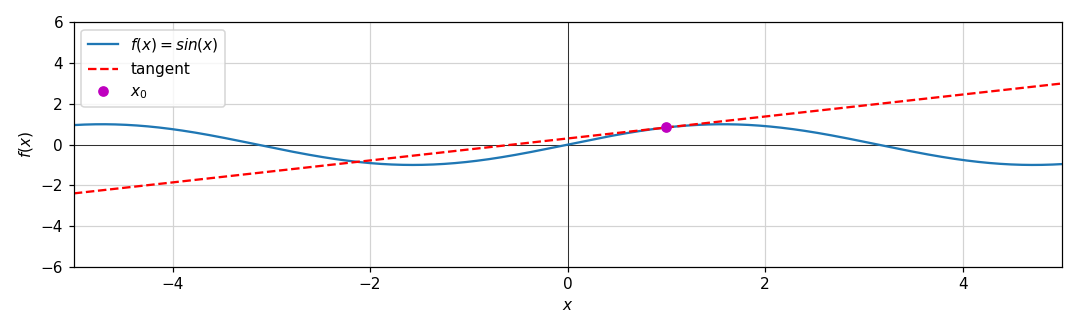

ToggleButtons(description='Select: ', options=(('sine function', 0), ('unit step function', 1), ('unit ramp fu…

FloatSlider(value=1.0, description='$x_0$', layout=Layout(flex='5 5 auto', width='auto'), max=5.0, min=-5.0, r…

Output()

In [3]:
# sinus, step, ramp, x^2, sqrt(x)
functionSelect = widgets.ToggleButtons(
    options=[('sine function', 0), ('unit step function', 1), ('unit ramp function', 2), ('parabolic function', 3), ('square root function', 4)],
    description='Select: ')

fig = plt.figure(num='Linearization of a function')
fig.set_size_inches((9.8, 3))
fig.set_tight_layout(True)
f1 = fig.add_subplot(1, 1, 1)

f1.grid(which='both', axis='both', color='lightgray')

f1.set_xlabel('$x$')
f1.set_ylabel('$f(x)$')

f1.axhline(0,Color='black',linewidth=0.5)
f1.axvline(0,Color='black',linewidth=0.5)

func_plot, = f1.plot([],[])
tang_plot, = f1.plot([],[])
point_plot, = f1.plot([],[])

f1.set_xlim((-5,5))
f1.set_ylim((-6,6))

def create_draw_functions(x0,index):
    x=np.linspace(-5,5,1001)
    h=0.001 # equal to \Delta x
    
    global func_plot, tang_plot, point_plot
       
    if index==0:
        y=np.sin(x)
        fprime=(np.sin(x0+h)-np.sin(x0))/h
        tang=np.sin(x0)+fprime*(x-x0)
        fx0=np.sin(x0)        
    elif index==1:
        y=np.zeros(1001)
        y[510:1001]=1
    elif index==2:
        y=np.zeros(1001)
        y[500:1001]=np.linspace(0,5,501)
    elif index==3:
        y=x*x
        fprime=((x0+h)*(x0+h)-(x0*x0))/h
        tang=x0*x0+fprime*(x-x0)
        fx0=x0*x0        
    elif index==4:
        x1=np.linspace(0,5,500)
        y=np.sqrt(x1)
        if x0>=0:
            fprime=(np.sqrt(x0+h)-np.sqrt(x0))/h
            tang=np.sqrt(x0)+fprime*(x-x0)
            fx0=np.sqrt(x0)
    
    f1.lines.remove(func_plot)
    f1.lines.remove(tang_plot)
    f1.lines.remove(point_plot)
    
    if index == 0:
        func_plot, = f1.plot(x,y,label='$f(x)=sin(x)$',color='C0')
        tang_plot, = f1.plot(x,tang,'--r',label='tangent')
        point_plot, = f1.plot(x0,fx0,'om',label='$x_0$')
        for txt in f1.texts: 
                txt.set_visible(False)
    elif index == 1: # in case of the unit step function
        if x0==0:
            func_plot, = f1.step(x,y,label='$f(x)=u(x)$',color='C0')
            tang_plot, = f1.plot([],[])
            point_plot, = f1.plot([],[])    
            f1.text(0.1,1.3,'Linearization at $x_0=0$ is not possible!',fontsize=14)
        elif x0<0:
            tang=np.zeros(1001)
            func_plot, = f1.step(x,y,label='$f(x)=u(x)$',color='C0')
            tang_plot, = f1.plot(x,tang,'--r',label='tangent')
            point_plot, = f1.plot(x0,[0],'om',label='$x_0$')
            for txt in f1.texts: 
                txt.set_visible(False)
        elif x0>0:
            tang=np.ones(1001)
            func_plot, = f1.step(x,y,label='$f(x)=u(x)$',color='C0')
            tang_plot, = f1.plot(x,tang,'--r',label='tangent')
            point_plot, = f1.plot(x0,[1],'om',label='$x_0$')
            for txt in f1.texts: 
                txt.set_visible(False)
    elif index==2: # in case of the ramp
        if x0<0:
            tang=np.zeros(1001)
            func_plot, = f1.plot(x,y,label='$f(x)=R(x)$',color='C0')
            tang_plot, = f1.plot(x,np.zeros(1001),'--r',label='tangent')
            point_plot, = f1.plot(x0,[0],'om',label='$x_0$')
            for txt in f1.texts: 
                txt.set_visible(False)
        elif x0>=0:
            tang=x
            func_plot, = f1.plot(x,y,label='$f(x)=R(x)$',color='C0')
            tang_plot, = f1.plot(x,tang,'--r',label='tangent')
            point_plot, = f1.plot(x0,x0,'om',label='$x_0$')
            for txt in f1.texts: 
                txt.set_visible(False)
    elif index==3:
        func_plot, = f1.plot(x,y,label='$f(x)=x^2$',color='C0')
        tang_plot, = f1.plot(x,tang,'--r',label='tangent')
        point_plot, = f1.plot(x0,fx0,'om',label='$x_0$')
        for txt in f1.texts: 
                txt.set_visible(False)        
    elif index==4: #in case of the square root function
        if x0<0:
            for txt in f1.texts: 
                txt.set_visible(False)
            func_plot, = f1.plot(x1,y,label='$f(x)=\sqrt{x}$',color='C0')
            tang_plot, = f1.plot([],[])
            point_plot, = f1.plot([],[])
            f1.text(-4.9,1.3,'Square root function is not defined for $x<0$!',fontsize=14)
        else:
            func_plot, = f1.plot(x1,y,label='$f(x)=\sqrt{x}$',color='C0')
            tang_plot, = f1.plot(x,tang,'--r',label='tangent')
            point_plot, = f1.plot(x0,fx0,'om',label='$x_0$')
            for txt in f1.texts: 
                txt.set_visible(False)
    
    if (index==1) and x0==0 or (index==4 and x0<0):
        display(Markdown('See comment on the figure.'))
    else:
        k=round(((tang[-1]-tang[0])/(x[-1]-x[0])),3)
        n=round(((tang[-1]-k*x[-1])),3)
        display(Markdown('Equation of the tangent: $y=%.3fx+%.3f$.'%(k,n)))
    
    f1.legend()
    
    f1.relim()
    f1.relim()
    f1.autoscale_view()
    f1.autoscale_view()   

    
x0_slider = widgets.FloatSlider(value=1, min=-5, max=5, step=0.2, description='$x_0$',
                          continuous_update=True, layout=widgets.Layout(width='auto', flex='5 5 auto'),readout_format='.1f')

input_data = widgets.interactive_output(create_draw_functions, {'x0':x0_slider, 'index':functionSelect})

def update_sliders(index):
    global x0_slider
    
    x0val = [0.5, 0.5, 1, 1, 5, 10]
    x0slider.value = x0val[index]
    
input_data2 = widgets.interactive_output(update_sliders, {'index':functionSelect})

display(functionSelect)

display(x0_slider,input_data)

# display(Markdown("The system can be represented as $f(x)=5$ for small excursions of x about x0."))